In [1]:
from states import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams.update({'font.size': 20})

In [2]:
pos = np.array([6*10**3, 6*10**3, 6*10**3]) # km 
vel = np.array([-5, 5, 0]) #km / sec
mu = 4*10**5 # km^3 / sec^2
time = 0 # sec
state = Cartesian_State(pos, vel, mu, time)

In [3]:
kep_state = state.to_kep_state()

period = 2 * np.pi / math.sqrt(kep_state.mu) * math.sqrt(kep_state.a**3)

In [4]:
state_list = [kep_state]
time_list = [0]
time_interval = 60
for time in np.arange(time_interval, period, time_interval): 
    state_list.append(kep_state.propagate(time))
    time_list.append(time)

In [5]:
positions = [s.radius for s in state_list]
velocities = [np.linalg.norm(s.cart_vel) for s in state_list]

## Now, lets plot this orbit in position and velocity space

Text(0, 0.5, 'Radius magnitude (km)')

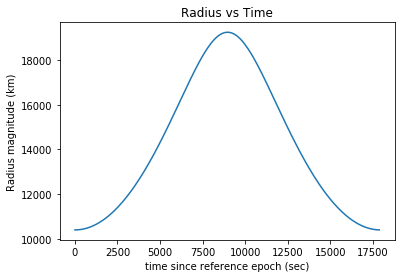

In [6]:
sns.lineplot(time_list, positions)
plt.title("Radius vs Time")
plt.xlabel("time since reference epoch (sec)")
plt.ylabel("Radius magnitude (km)")

Text(0, 0.5, 'Velocity magnitude (km/sec)')

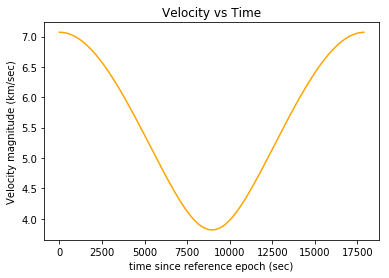

In [7]:
sns.lineplot(time_list, velocities, color="orange")
plt.title("Velocity vs Time")
plt.xlabel("time since reference epoch (sec)")
plt.ylabel("Velocity magnitude (km/sec)")

# And now the position vs Velocity

Text(0, 0.5, 'Radius Magnitude (km/sec)')

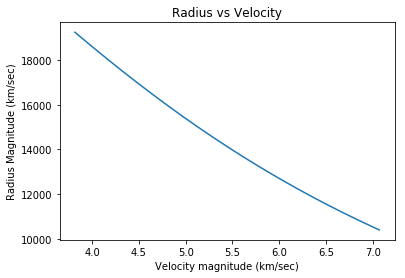

In [8]:
sns.lineplot(velocities, positions)
plt.title("Radius vs Velocity")
plt.xlabel("Velocity magnitude (km/sec)")
plt.ylabel("Radius Magnitude (km/sec)")

# Now to plot in XYZ space 

In [9]:
x_pos, y_pos, z_pos = ([], [], [])
for state in state_list: 
    x, y, z = state.cart_pos
    x_pos.append(x)
    y_pos.append(y)
    z_pos.append(z)

Text(0.5, 0.92, 'X-Y-Z space orbit plot')

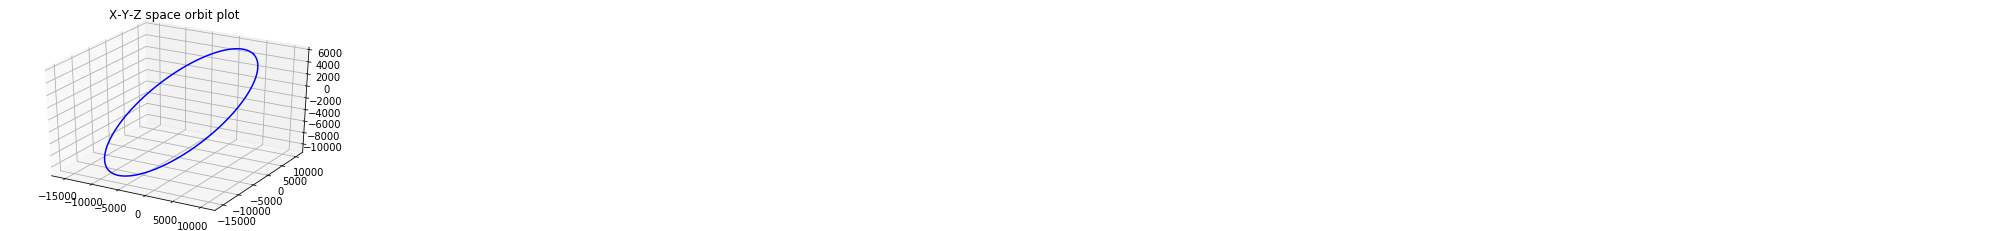

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x_pos, y_pos, z_pos, 'blue')
plt.title("X-Y-Z space orbit plot")

# Trying out the cartesian plotter

In [19]:
pos_cart = np.array([6*10**3, 6*10**3, 6*10**3]) # km 
vel_cart = np.array([-5, 5, 0]) #km / sec
mu_cart = 4*10**5 # km^3 / sec^2
time_cart = 0 # sec
state_cart = Cartesian_State(pos_cart, vel_cart, mu_cart, time_cart)

In [49]:
state_list_cart = [state_cart]
time_list_cart = [0]
time_interval_cart = 10
for time in np.arange(time_interval_cart, period, time_interval_cart): 
    state_cart = state_cart.propagate(time)
    state_list_cart.append(state_cart)
    time_list_cart.append(time)

In [50]:
x_pos_cart, y_pos_cart, z_pos_cart = ([], [], [])
for state_cart in state_list_cart: 
    x_cart, y_cart, z_cart = state_cart.vel
    x_pos_cart.append(x_cart)
    y_pos_cart.append(y_cart)
    z_pos_cart.append(z_cart)

Text(0.5, 0.92, 'X-Y-Z space orbit plot')

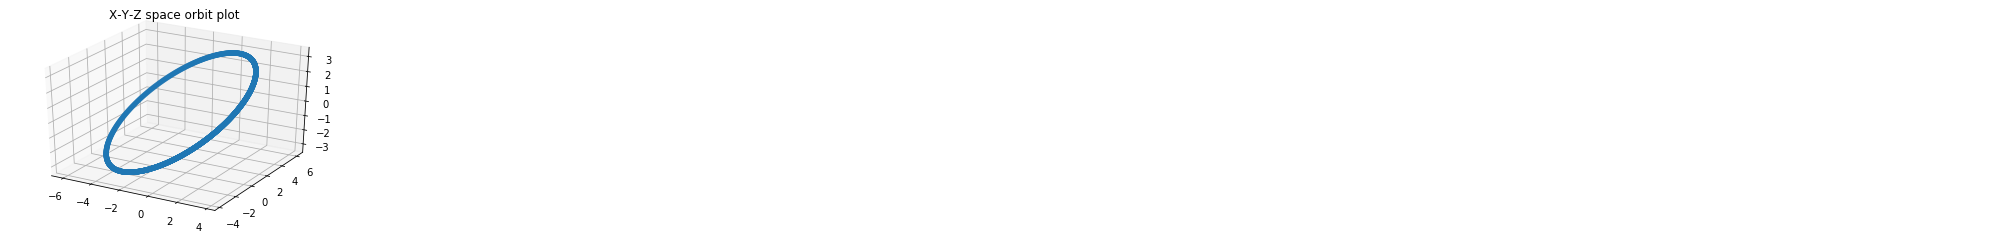

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_pos_cart, y_pos_cart, z_pos_cart, 'blue')
plt.title("X-Y-Z space orbit plot")